<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
    SELECT COUNT (v.id) "Количество вакансий"
    FROM vacancies v
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
    SELECT COUNT (e.name) "Количество работодателей"
    FROM employers e
'''

In [7]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
    SELECT COUNT (a.id) "Количество регионов"
    FROM areas a
'''

In [9]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
    SELECT COUNT (i.id) "Количество сфер деятельности"
    FROM industries i
'''

In [11]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,Количество сфер деятельности
0,294


***

# Выводы по предварительному анализу данных:

* В рассматриваемой базе данных зафиксировано внушительное число вакансий — 49197. Такой объем данных может говорить о высокой активности на рынке труда, а также о широком выборе вариантов для соискателей.

* Число работодателей достигает 23501, что подчеркивает значительное присутствие различных компаний и организаций, размещающих предложения о работе. Это демонстрирует многообразие участников рынка труда.

* Также важно отметить географическое распределение вакансий: данные охватывают 1362 региона. Этот факт указывает на возможность трудоустройства в разных уголках страны или даже за её пределами.

* Кроме того, сфера деятельности охватывает 294 направления, что говорит о богатом разнообразии отраслей экономики, где предлагаются рабочие места.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''
    SELECT 
        COUNT (v.id) cnt,
        a.name area
    FROM vacancies v
    JOIN areas a ON a.id = v.area_id
    GROUP BY 2
    ORDER BY 1 DESC
'''

In [13]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''
    SELECT 
        COUNT (*) "Количество вакансий"
    FROM vacancies v
    WHERE 
        salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [15]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,Количество вакансий
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
    SELECT 
        ROUND (AVG(v.salary_from)) "Среднее значение нижней границы зп вилки",
        ROUND (AVG(v.salary_to)) "Среднее значение верхней границы зп вилки"
    FROM vacancies v
'''

In [17]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,Среднее значение нижней границы з,Среднее значение верхней границы
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
    SELECT
        COUNT(v.id) "Количество вакансий",
        v.schedule "Тип рабочего графика",
        v.employment "Тип трудоустройства"
    FROM vacancies v
    GROUP BY v.schedule, v.employment
    ORDER BY 1 DESC
'''

In [19]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,Количество вакансий,Тип рабочего графика,Тип трудоустройства
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''
    SELECT
        COUNT(v.id) cnt,
        v.experience "Требование к опыту"
    FROM vacancies v
    GROUP BY v.experience
    ORDER BY 1
'''

In [21]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,cnt,Требование к опыту
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

# Результаты детального анализа вакансий таковы:

* Топ-5 городов по количеству предложений работы включает столицу России, Северную столицу, Минск, Новосибирск и Алматы. Эти мегаполисы отличаются высоким уровнем деловой активности, что подчеркивает их роль как важных экономических центров.

* Данные о заработной плате представлены для 24073 позиций. Такой объем информации дает возможность изучить уровень оплаты труда и понять, как формируется стоимость рабочей силы на рынке.

* Средние значения зарплатных вилок составляют 71065 для минимального порога и 110537 для максимального. Этот диапазон отражает предложения большинства работодателей и может быть полезен кандидатам при формировании финансовых ожиданий.

* Наиболее часто работодатели отдают предпочтение специалистам с опытом работы от года до трех лет. Это может говорить о том, что компании стремятся нанимать сотрудников, обладающих достаточной квалификацией для решения задач средней сложности.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# текст запроса
query_5_1 = f'''
    (SELECT
        e.name "Работодатель",
        COUNT(v.id) "Количество вакансий"
    FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY 2 DESC
    LIMIT 1)
    
    UNION ALL
    
    (SELECT
        e.name "Работодатель",
        COUNT(v.id) "Количество вакансий"
    FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
    GROUP BY e.name
    ORDER BY 2 DESC
    OFFSET 4
    LIMIT 1)
'''

In [23]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,Работодатель,Количество вакансий
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# текст запроса
query_5_2 = f'''
    SELECT 
        a.name "Регион",
        COUNT(e.name) "Количество работодателей",
        COUNT(v.name) "Количество вакансий"
    FROM areas a
        LEFT JOIN employers e ON a.id = e.area
        LEFT JOIN vacancies v ON v.area_id = a.id
    WHERE v.area_id IS NULL
    GROUP BY 1
    ORDER BY 3 ASC, 2 DESC
    LIMIT 1
'''

In [25]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,Регион,Количество работодателей,Количество вакансий
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [26]:
# текст запроса
query_5_3 = '''
    SELECT       
        e.name "Работодатель",
        COUNT(DISTINCT v.area_id) "Количествово регионов"
    FROM vacancies v
    FULL JOIN employers e ON v.employer_id = e.id
    GROUP BY 1
    ORDER BY 2 DESC
'''

In [27]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,Работодатель,Количествово регионов
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [28]:
# текст запроса
query_5_4 = f'''
    SELECT       
        COUNT(*) "Количество работодателей"
    FROM employers_industries ei
    RIGHT JOIN employers e ON ei.employer_id = e.id
    WHERE ei.industry_id IS NULL
'''

In [29]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,Количество работодателей
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [30]:
# текст запроса
query_5_5 = f'''
    SELECT
        e.name "Названия компаний",
        COUNT(ei.industry_id) "Количество сфер деятельности"
    FROM employers e
    FULL JOIN employers_industries ei ON ei.employer_id = e.id
    GROUP BY e.name
    HAVING COUNT(ei.industry_id) = 4
    ORDER BY 1
    OFFSET 2
    LIMIT 1
'''

In [31]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,Названия компаний,Количество сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [32]:
# текст запроса
query_5_6 = f'''
    SELECT
        COUNT(ei.employer_id) "Количество работодателей"
    FROM employers_industries ei
    LEFT JOIN industries i ON ei.industry_id = i.id
    WHERE i.name = 'Разработка программного обеспечения'
'''

In [33]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,Количество работодателей
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [34]:
# код для получения списка городов-милионников
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
table = pd.read_html(url)
city_df = table[0]
city_list = tuple(city_df['Город'])

city_list

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Краснодар',
 'Самара',
 'Ростов-на-Дону',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [35]:
# текст запроса
query_5_7 = f'''
    (SELECT
        a.name "Регионы-миллионники",
        COUNT(v.id) "Количество вакансий"
    FROM vacancies v
    LEFT JOIN employers e on v.employer_id = e.id
    LEFT JOIN areas a on v.area_id = a.id
    WHERE
        e.name = 'Яндекс'
        and a.name in {city_list}
    GROUP BY a.name)

        UNION ALL

    (SELECT 
        'Total', 
        COUNT(*)
    FROM vacancies v
    LEFT JOIN employers e on v.employer_id = e.id
    LEFT JOIN areas a on v.area_id = a.id
    WHERE
        e.name = 'Яндекс'
        and a.name in {city_list})
    
    ORDER BY 2
'''

In [36]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,Регионы-миллионники,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# Результаты исследования работодателей показывают следующее:

* Компания «Яндекс» лидирует по числу доступных вакансий, что демонстрирует её высокую активность и значительное влияние на рынке труда.

* В регионах, где вакансии отсутствуют, большинство компаний базируется в России. Возможно, это связано с их фокусом на локальном рынке труда.

* Обнаружено 8419 организаций, не указавших свою сферу деятельности, что может свидетельствовать о недостаточно полном заполнении информации в базе данных.

* Наиболее часто требуемый опыт работы составляет от 1 до 3 лет. Это объясняется тем, что компании заинтересованы в сотрудниках с определённым опытом, но без излишней специализации.

* Полная занятость остаётся наиболее распространённой формой трудоустройства, что подчёркивает предпочтение работодателей к сотрудникам, работающим на постоянной основе.

* «Яндекс» разместил 485 вакансий в 17 городах-миллионниках, что говорит о широком географическом присутствии компании и возможности трудоустройства в разных регионах.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [37]:
# текст запроса
query_6_1 = f'''
    SELECT
        COUNT(v.id) "Количество вакансий, связаных с данными"
    FROM vacancies v
    WHERE 
        lower(v.name) LIKE '%data%' OR
        lower(v.name) LIKE '%данн%'
'''

In [38]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,"Количество вакансий, связаных с да"
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [39]:
# текст запроса
query_6_2 = f'''
    SELECT
        COUNT(v.id) "Количество вакансий Junior DS"
    FROM vacancies v
    WHERE 
        (lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%')
        AND
        (lower(v.name) LIKE '%junior%' OR
        v.experience LIKE '%Нет опыта%' OR
        v.experience LIKE '%Стажировка%')
'''

In [40]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,Количество вакансий Junior DS
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [41]:
# текст запроса
query_6_3 = f'''
    SELECT
        COUNT(v.id) "Количество вакансий DS"
    FROM vacancies v
    WHERE
        (lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%')
        AND
        (lower(v.key_skills) LIKE '%sql%' OR
        lower(v.key_skills) LIKE '%postgres%')
        
'''

In [42]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,Количество вакансий DS
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [43]:
# текст запроса
query_6_4 = f'''
    SELECT
        COUNT(v.id) "Количество вакансий DS"
    FROM vacancies v
    WHERE
        (lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (lower(v.name) LIKE '%ml%' AND lower(v.name) NOT LIKE '%html%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%')
        AND
        lower(v.key_skills) LIKE '%python%'
        
'''

In [44]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,Количество вакансий DS
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [45]:
# текст запроса
query_6_5 = f'''
    SELECT
        round(AVG(LENGTH(v.key_skills) - 
        LENGTH(REPLACE(v.key_skills, chr(9), '')) + 1),2) "Среднее количество ключевых навыков"
    FROM vacancies v
    WHERE
        (lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%')
        
'''

In [46]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,Среднее количество ключевых навык
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [47]:
# текст запроса
query_6_6 = f'''
    SELECT
        round(AVG(COALESCE((v.salary_to + v.salary_from)/2, v.salary_to, v.salary_from))) "Средняя зарплата дата-сайентиста"
    FROM vacancies v
    WHERE
        (lower(v.name) LIKE '%data scientist%' OR
        lower(v.name) LIKE '%data science%' OR
        lower(v.name) LIKE '%исследователь данных%' OR
        (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
        lower(v.name) LIKE '%machine learning%' OR
        lower(v.name) LIKE '%машинн%обучен%')
        AND
        (v.salary_to IS NOT NULL OR v.salary_from IS NOT NULL)
        AND
        v.experience = 'От 3 до 6 лет'
        
'''

In [48]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,Средняя зарплата дата-сайентиста
0,243115.0


***

# Результаты предметного анализа демонстрируют следующее:

* Общее число вакансий, ориентированных на работу с данными, достигает 1771, что подчеркивает высокий спрос на специалистов в сфере анализа данных и data science.

* Для начинающих дата-сайентистов доступно 51 подходящая позиция, что свидетельствует о наличии возможностей для старта карьеры в этой области.

* В случае, когда SQL или postgre указаны как ключевые навыки, количество вакансий составляет 229, подтверждая значимость владения этими инструментами для успешной работы.

* Когда Python выступает обязательным требованием, число вакансий достигает 357, что подчеркивает его важность как одного из основных инструментов в профессии.

* Среднее количество ключевых компетенций, предъявляемых к дата-сайентисту, превышает 6, что говорит о необходимости обладания разносторонними знаниями и умениями.

* Опытные специалисты со стажем от 3 до 6 лет могут рассчитывать на среднюю зарплату в размере 243115, что демонстрирует привлекательность данной профессии с финансовой точки зрения.

# Дополнительные исследования данных.

7.1 Проведём анализ количества вакансий по сферам деятельности.

Выведем ТОП-5 сфер деятельности по условию:

Наибольшее количество вакансий

Знание (навыки) SQL и Python

Гибкий график или удаленная работа

Со стажировкой или полной занятостью

In [49]:
query_7_1 = f'''
    SELECT
        i.name "Сфера деятельности",
        COUNT(v.id) "Количество вакансий"
    FROM industries i
    LEFT JOIN employers_industries ei ON i.id = ei.industry_id
    LEFT JOIN vacancies v ON ei.employer_id = v.employer_id
    WHERE
        v.key_skills like '%Python%' and
        v.key_skills like '%SQL%' and
        (v.schedule like '%Гибкий график%' or v.schedule like '%Удаленная работа%') and
        (v.employment like '%Стажировка%' or v.employment like '%Полная занятость%')
    GROUP BY i.name
    ORDER BY COUNT(v.id) DESC
    LIMIT 5
'''
df = pd.read_sql_query(query_7_1, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3107962833.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_1, connection)


,Сфера деятельности,Количество вакансий
0,Разработка программного обеспечения,260
1,"Системная интеграция, автоматизации технологи...",179
2,"Интернет-компания (поисковики, платежные систе...",134
3,Банк,54
4,Коллекторская деятельность,28


7.2 Проведём анализ количества работодателей по сферам деятельности.

* Выведем ТОП-3 сферы деятельности по условию:

* Наибольшее количество работодателей

* Связано с алкоголем или банком, или вакансии производства

In [50]:
query_7_2 = f'''
    SELECT
        i.name "Сфера деятельности",
        COUNT(DISTINCT ei.employer_id) "Количество работодателей"
    FROM employers_industries ei
    JOIN industries i ON ei.industry_id = i.id
    WHERE
        lower(i.name) like '%алко%' OR
        lower(i.name) like '%банк%' OR
        lower(i.name) like '%производ%'
    GROUP BY i.name
    ORDER BY COUNT(DISTINCT ei.employer_id) DESC
    LIMIT 10
'''
df = pd.read_sql_query(query_7_2, connection)
df

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\3447437016.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_7_2, connection)


,Сфера деятельности,Количество работодателей
0,"Промышленное, бытовое электрооборудование и эл...",332
1,"Электронно-вычислительная, оптическая, контрол...",303
2,"Металлические изделия, металлоконструкции (про...",295
3,Банк,249
4,"Производство мультимедиа, контента, редакторск...",227
5,"Оборудование и станки для добывающей, энергети...",201
6,"Производство печатной, полиграфической продукции",196
7,Фармацевтическая продукция (производство),160
8,Мебель (производство),155
9,"Одежда, обувь, аксессуары, текстиль (производс...",154


# Заверешение исследования

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\847412366.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_8_1, connection)
C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\847412366.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x='area', y='cnt', palette=filtred_color);


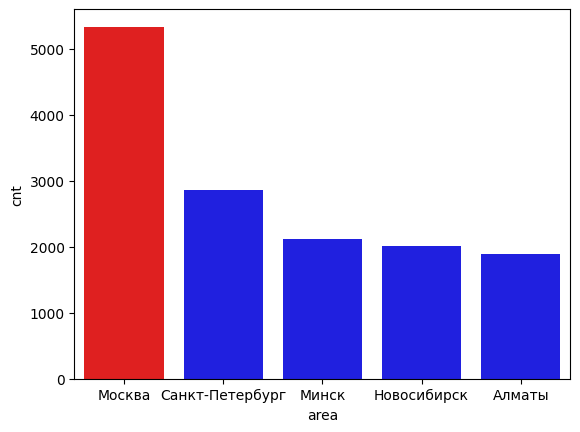

In [51]:
query_8_1 = f'''
    SELECT 
        COUNT (v.id) cnt,
        a.name area
    FROM vacancies v
    JOIN areas a ON a.id = v.area_id
    GROUP BY 2
    ORDER BY 1 DESC
    LIMIT 5
'''

df = pd.read_sql_query(query_8_1, connection)

filtred_color = [('red' if x > 3000 else 'blue') for x in df.cnt]
sns.barplot(df, x='area', y='cnt', palette=filtred_color);

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\866555331.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_8_2, connection)


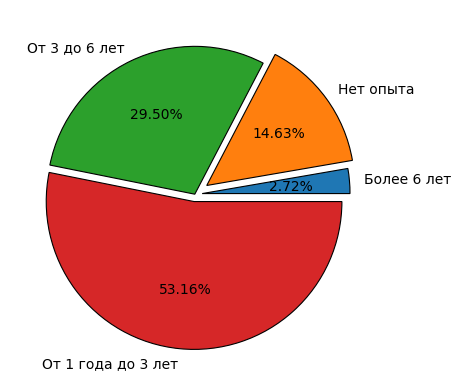

In [52]:
query_8_2 = f'''
    SELECT
        COUNT(v.id) cnt,
        v.experience "Требование к опыту"
    FROM vacancies v
    GROUP BY v.experience
    ORDER BY 1
'''

df = pd.read_sql_query(query_8_2, connection)

plt.pie(
    df['cnt'],
    labels = df["Требование к опыту"].values,
    autopct = '%.2f%%',
    explode = (0.05, 0.1, 0, 0.05),
    wedgeprops = {'lw':0.8,'edgecolor':'k'},   
);

C:\Users\alesh\AppData\Local\Temp\ipykernel_2248\2106297049.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_8_3, connection)


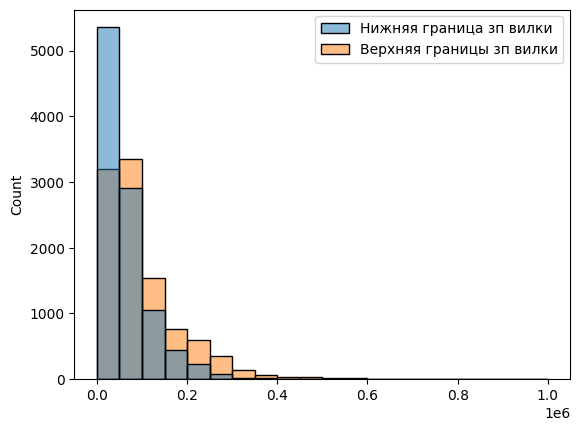

In [53]:
query_8_3 = f'''
select 
    salary_from "Нижняя граница зп вилки", 
    salary_to "Верхняя границы зп вилки"
from
    vacancies
'''
df = pd.read_sql_query(query_8_3, connection)

df.dropna(inplace=True)
sns.histplot(data=df, bins=20);

In [54]:
# Закрываем соединение
connection.close()

# Общий вывод по проекту

* В выборке представлено 49197 вакансий, охватывающих деятельность 23501 работодателя. Указана информация по 1362 регионам в рамках 294 направлений работы. Наибольшее число предложений сосредоточено в крупнейших городах, что подчеркивает их ключевую роль на рынке труда и их значимость как экономических центров.

* Средний уровень нижней границы зарплатной вилки составляет 71065 рублей, а верхней — 110537 рублей. Наиболее часто требуемым опытом является стаж от 1 до 3 лет. Преобладающей формой занятости остается полная занятость, которая пользуется наибольшей популярностью среди соискателей.

* Компания "Яндекс" возглавляет список по количеству вакансий, предлагая 1933 рабочих места. Отдельного внимания заслуживает сфера работы с данными, где насчитывается 1771 вакансия. Из них Python указан как ключевой навык в 357 позиции. В среднем дата-сайентист должен обладать более чем шестью ключевыми компетенциями, что обеспечивает ему среднюю заработную плату на уровне 243115 рублей.

* Наибольшее количество вакансий приходится на область разработки программного обеспечения, где зарегистрировано 12499 предложений от 3553 компаний-работодателей.